<a href="https://colab.research.google.com/github/vishalrkumbhar/play-store-EDA/blob/main/Play_Store_App_Review_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

#### Before deep-diving straight into the problem solution, we need to create a roadmap which we will be referring to throughout this exploratory data analysis.
#### Google Play Store is a digital store managed and developed by Google, which provides services like installing applications for android and Chrome-based OS users.
#### After installing applications some users give reviews and rating for the app they have used, this ratings and reviews defines the satisfaction of the customers, that's directly proportional to the performance of the app. So it is essential to analyze these ratings and reviews to improve the quality of service which will cater to the need of end-users.
#### The objective of this project is to deliver insights to understand customer demands better and thus help developers to popularize the product. It is of 10k plus Play Store apps for analyzing the Android market. This dataset contains details of different applications and reviews from different users.

### Discussion of Google play store dataset will involve various steps such as

#### 1. loading the data into the data frame
#### 2. cleaning the data
#### 3. extracting statistics from the dataset
#### 4. exploratory analysis and visualizations
#### 5. questions that can be asked from the dataset
#### 6. conclusion

In [1]:
# importing libraries
import pandas as pd               # for data manipulation
import numpy as np                # for mathemathical operations and linear algebra
import matplotlib.pyplot as plt   # for data visualisation

### Read the Dataset into a dataframe

In [2]:
# reading dataset from the URL
GPStore = pd.read_csv('/content/Play Store Data.csv')

In [3]:
# type of the variable GPStore
type(GPStore)

pandas.core.frame.DataFrame

In [4]:
# displaying the head or the first 10 rows of the dataframe, default 5
GPStore.head(10)

App  ...   Android Ver
0     Photo Editor & Candy Camera & Grid & ScrapBook  ...  4.0.3 and up
1                                Coloring book moana  ...  4.0.3 and up
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ...  4.0.3 and up
3                              Sketch - Draw & Paint  ...    4.2 and up
4              Pixel Draw - Number Art Coloring Book  ...    4.4 and up
5                         Paper flowers instructions  ...    2.3 and up
6            Smoke Effect Photo Maker - Smoke Editor  ...  4.0.3 and up
7                                   Infinite Painter  ...    4.2 and up
8                               Garden Coloring Book  ...    3.0 and up
9                      Kids Paint Free - Drawing Fun  ...  4.0.3 and up

[10 rows x 13 columns]

In [5]:
# displaying the tail or the bottom 5 rows of the dataframe
GPStore.tail(10)

App  ...         Android Ver
10831                       payermonstationnement.fr  ...          4.0 and up
10832                                       FR Tides  ...          2.1 and up
10833                                    Chemin (fr)  ...          2.2 and up
10834                                  FR Calculator  ...          4.1 and up
10835                                       FR Forms  ...          4.0 and up
10836                               Sya9a Maroc - FR  ...          4.1 and up
10837               Fr. Mike Schmitz Audio Teachings  ...          4.1 and up
10838                         Parkinson Exercices FR  ...          2.2 and up
10839                  The SCP Foundation DB fr nn5n  ...  Varies with device
10840  iHoroscope - 2018 Daily Horoscope & Astrology  ...  Varies with device

[10 rows x 13 columns]

In [6]:
# display the shape of the dataframe, i.e., the no. of rows and columns 
GPStore.shape

(10841, 13)

In [7]:
# prints a summary of the dataframe rows and columns, including information on the datatypes and non-null values
GPStore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [8]:
GPStore.describe()

Rating
count  9367.000000
mean      4.193338
std       0.537431
min       1.000000
25%       4.000000
50%       4.300000
75%       4.500000
max      19.000000

### Explore all columns one by one and check for invalid data and clean data accordingly. 

#### App Column:
###### Check for duplicate values in App column if any then drop those rows. 

In [9]:
# get the count/frequency of all the unique values of the specified column
GPStore['App'].value_counts()

ROBLOX                                                9
CBS Sports App - Scores, News, Stats & Watch Live     8
Candy Crush Saga                                      7
Duolingo: Learn Languages Free                        7
ESPN                                                  7
                                                     ..
Aegis BT                                              1
Resume Builder Free, 5 Minute CV Maker & Templates    1
OurHome – chores, rewards, groceries and calendar     1
Training course: Learn Nursing                        1
Digoo·Cloud                                           1
Name: App, Length: 9660, dtype: int64

In [10]:
# display the shape of the dataframe, i.e., the no. of rows and columns 
print(GPStore.shape)

# remove the duplicate values from the dataframe, specifying the column name in the subset parameter 
GPStore = GPStore.drop_duplicates(subset=['App'], keep = 'first')

# display the shape of the dataframe, i.e., the no. of rows and columns 
print(GPStore.shape)

(10841, 13)
(9660, 13)


### Category Column:
##### Check for unique categories. 

In [11]:
# get all the unique values present in the specified column
GPStore.Category.unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

<b> In the 'Category' column we have one value as '1.9' which seems to be invalid. Let's have a look at that data entry. 

In [12]:
# dataframe filtering based on a condition
GPStore[GPStore.Category == '1.9']

App Category  ...  Current Ver Android Ver
10472  Life Made WI-Fi Touchscreen Photo Frame      1.9  ...   4.0 and up         NaN

[1 rows x 13 columns]

In [13]:
# get the index of the dataframe
GPStore.index

Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            10831, 10832, 10833, 10834, 10835, 10836, 10837, 10838, 10839,
            10840],
           dtype='int64', length=9660)

In [14]:
# remove the row with the specified index; axis 0 implies along the rows; axis 1 along the columns
GPStore=GPStore.drop([10472],axis=0)

In [15]:
# display the shape of the dataframe, i.e., the no. of rows and columns 
GPStore.shape

(9659, 13)

### Rating Column:
###### Check for valid rating values

In [16]:
# statistical summary of the specified numerical variable
GPStore['Rating'].describe()

count    8196.000000
mean        4.173243
std         0.536625
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

<b> All the rating values are within the range so no invalid data is present in 'Rating' Column. But the count of rating values is 8196 where as we have 9659 entries in our dataset. It shows that there are missing values in 'Rating Column. Lets check for the Missing Values.  

In [17]:
# find the total no. of missing values present in the specified column
GPStore.Rating.isnull().sum()

1463

#### Handling Null Values By Linear Interpolation method

In [18]:
GPStore["Rating"].interpolate(method='linear', limit_direction='forward', axis=0)

0        4.10
1        3.90
2        4.70
3        4.50
4        4.30
         ... 
10836    4.50
10837    5.00
10838    4.75
10839    4.50
10840    4.50
Name: Rating, Length: 9659, dtype: float64

In [19]:
# display the shape of the dataframe, i.e., the no. of rows and columns 
GPStore.shape

(9659, 13)

### Review Column:
###### Check for any non numeric values if any replace it and convert it to a numeric column

In [20]:
# displays frequency measures for a non-numerical column
GPStore.Reviews.describe()    # The datatype for the reviews column is string 

count     9659
unique    5330
top          0
freq       593
Name: Reviews, dtype: object

In [21]:
# check for any non numeric value 
GPStore.Reviews.str.isnumeric().sum()   

9659

In [22]:
# convert the 'Review' column to numeric
GPStore.Reviews=pd.to_numeric(GPStore.Reviews) 

In [23]:
# statistical summary of the specified numerical variable
GPStore.Reviews.describe()


count    9.659000e+03
mean     2.165926e+05
std      1.831320e+06
min      0.000000e+00
25%      2.500000e+01
50%      9.670000e+02
75%      2.940100e+04
max      7.815831e+07
Name: Reviews, dtype: float64

### Size Column:
#####  In the 'Size' column we have the values as '20M' and '10K' which represents the size of app in MB and KB respectively. So replace 'M' and 'K' with their equivalent numeric values in bytes. 

In [24]:
# get the count/frequency of all the unique values of the specified column
GPStore.Size.value_counts()

Varies with device    1227
11M                    182
12M                    181
14M                    177
13M                    177
                      ... 
475k                     1
50k                      1
782k                     1
598k                     1
965k                     1
Name: Size, Length: 461, dtype: int64

In [25]:
GPStore['Size']

0                       19M
1                       14M
2                      8.7M
3                       25M
4                      2.8M
                ...        
10836                   53M
10837                  3.6M
10838                  9.5M
10839    Varies with device
10840                   19M
Name: Size, Length: 9659, dtype: object

In [26]:
# replace all the 'Varies with device' with 0
GPStore.Size = GPStore.Size.apply(lambda x: x.replace('Varies with device','0') if 'Varies with device' in x else x)

# replace all the 'k' representing thousand
GPStore.Size = GPStore.Size.apply(lambda x: x.replace('k','') if 'k' in x else x)

# replace all the 'M' representing Million with 3 zeroes
GPStore.Size = GPStore.Size.apply(lambda x: float(x.replace('M',''))*1024 if 'M' in x else x)


In [27]:
# convert to float datatype
GPStore.Size = GPStore.Size.apply(lambda x: float(x))

In [28]:
GPStore.Size

0        19456.0
1        14336.0
2         8908.8
3        25600.0
4         2867.2
          ...   
10836    54272.0
10837     3686.4
10838     9728.0
10839        0.0
10840    19456.0
Name: Size, Length: 9659, dtype: float64

In [29]:
# statistical summary of the specified numerical variable
GPStore.Size.describe()

count      9659.000000
mean      18231.394834
std       22011.410257
min           0.000000
25%        2969.600000
50%        9318.400000
75%       25600.000000
max      102400.000000
Name: Size, dtype: float64

In [30]:
GPStore=GPStore.rename(columns={'Size':'Size_in_KB'})   # rename the Size column to Size_in_KB 

### Installs column:
###### The Installs column shows the number of installations for an app. The values consists of '+' and ',' characters. So remove '+' and ',' present in Installs column and convert it to numeric. 

In [31]:
GPStore.Installs

0            10,000+
1           500,000+
2         5,000,000+
3        50,000,000+
4           100,000+
            ...     
10836         5,000+
10837           100+
10838         1,000+
10839         1,000+
10840    10,000,000+
Name: Installs, Length: 9659, dtype: object

In [32]:
# values are given as, for example, '1,000+'. Removes the '+' sign from the end of the string
GPStore.Installs=GPStore.Installs.apply(lambda x: x.strip('+'))

# numbers have commas in them, for eg., 100,000. Removes all the commas from the strings.
GPStore.Installs=GPStore.Installs.apply(lambda x: x.replace(',',''))

# get the count/frequency of all the unique values of the specified column
GPStore.Installs.value_counts()

1000000       1417
100000        1112
10000         1031
10000000       937
1000           888
100            710
5000000        607
500000         505
50000          469
5000           468
10             385
500            328
50             204
50000000       202
100000000      188
5               82
1               67
500000000       24
1000000000      20
0               15
Name: Installs, dtype: int64

In [33]:
# convert to numeric datatype
GPStore.Installs=pd.to_numeric(GPStore.Installs)

In [34]:
GPStore['Installs'].describe()

count    9.659000e+03
mean     7.777507e+06
std      5.375828e+07
min      0.000000e+00
25%      1.000000e+03
50%      1.000000e+05
75%      1.000000e+06
max      1.000000e+09
Name: Installs, dtype: float64

### Check the values in Type column 
##### The type of the app is categorized as "Free" or "Paid" and we have these values only. So no cleaning is required for this column.

In [35]:
# get the count/frequency of all the unique values of the specified column
GPStore.Type.value_counts()

Free    8902
Paid     756
Name: Type, dtype: int64

In [36]:
GPStore.Type.isnull().sum()

1

#### Fill categorical Null Values with simple imputer

In [37]:
# filling with most common class

from sklearn.impute import SimpleImputer
impute_size = SimpleImputer(strategy="most_frequent") 
GPStore['Type']=impute_size.fit_transform(GPStore[['Type']])

In [38]:
GPStore["Type"].describe()

count     9659
unique       2
top       Free
freq      8903
Name: Type, dtype: object

### Price Column
#####  The data for the paid apps is prefix with "\\$" character. Remove "$" before the price and convert it to numeric

In [39]:
# removing the dollar sign from the string
GPStore.Price=GPStore.Price.apply(lambda x: x.strip('$'))

In [40]:
# converting to numeric datatype
GPStore.Price=pd.to_numeric(GPStore.Price)

In [41]:
# statistical summary of the specified numerical variable
GPStore.Price.describe()

count    9659.000000
mean        1.099299
std        16.852152
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       400.000000
Name: Price, dtype: float64

### Content Rating column

In [42]:
# get all the unique values present in the specified column
GPStore['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

In [43]:
GPStore["Content Rating"].isnull().sum()

0

### Geners Column


In [44]:
# get all the unique values present in the specified column
GPStore.Genres.unique()

array(['Art & Design', 'Art & Design;Pretend Play',
       'Art & Design;Creativity', 'Art & Design;Action & Adventure',
       'Auto & Vehicles', 'Beauty', 'Books & Reference', 'Business',
       'Comics', 'Comics;Creativity', 'Communication', 'Dating',
       'Education;Education', 'Education', 'Education;Creativity',
       'Education;Music & Video', 'Education;Action & Adventure',
       'Education;Pretend Play', 'Education;Brain Games', 'Entertainment',
       'Entertainment;Music & Video', 'Entertainment;Brain Games',
       'Entertainment;Creativity', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Lifestyle;Pretend Play',
       'Adventure;Action & Adventure', 'Arcade', 'Casual', 'Card',
       'Casual;Pretend Play', 'Action', 'Strategy', 'Puzzle', 'Sports',
       'Music', 'Word', 'Racing', 'Casual;Creativity',
       'Casual;Action & Adventure', 'Simulation', 'Adventure', 'Board',
       'Trivia', 'Role 

### Last Updated column
#### Check for the data and convert it into date format

In [45]:
# convert to datetime datatype
GPStore['Last Updated']=pd.to_datetime(GPStore['Last Updated'])

In [46]:
# display the head or top 5 columns of the dataframe
GPStore['Last Updated'].head()

0   2018-01-07
1   2018-01-15
2   2018-08-01
3   2018-06-08
4   2018-06-20
Name: Last Updated, dtype: datetime64[ns]

### Current Ver Column
##### Check for the nan values

In [47]:
# count the no. of null values in the dataframe
GPStore['Current Ver'].isnull().sum()

8

In [48]:
# get the count/frequency of all the unique values of the specified column
GPStore['Current Ver'].value_counts()

Varies with device    1055
1.0                    799
1.1                    260
1.2                    176
2.0                    149
                      ... 
0.5.4                    1
5.11.3                   1
7.30.005                 1
5.29.02                  1
1.7.22                   1
Name: Current Ver, Length: 2817, dtype: int64

In [49]:
GPStore['Current Ver'].describe()

count                   9651
unique                  2817
top       Varies with device
freq                    1055
Name: Current Ver, dtype: object

#### Fill Missing Categorical Values In Current Var column

In [50]:
impute_size1 = SimpleImputer(strategy="most_frequent") 
GPStore['Current Ver']=impute_size1.fit_transform(GPStore[['Current Ver']])

In [51]:
GPStore['Current Ver'].isnull().sum()

0

### Andriod Ver

In [52]:
# get all the unique values present in the specified column
GPStore['Android Ver'].unique()

array(['4.0.3 and up', '4.2 and up', '4.4 and up', '2.3 and up',
       '3.0 and up', '4.1 and up', '4.0 and up', '2.3.3 and up',
       'Varies with device', '2.2 and up', '5.0 and up', '6.0 and up',
       '1.6 and up', '1.5 and up', '2.1 and up', '7.0 and up',
       '5.1 and up', '4.3 and up', '4.0.3 - 7.1.1', '2.0 and up',
       '3.2 and up', '4.4W and up', '7.1 and up', '7.0 - 7.1.1',
       '8.0 and up', '5.0 - 8.0', '3.1 and up', '2.0.1 and up',
       '4.1 - 7.1.1', nan, '5.0 - 6.0', '1.0 and up', '2.2 - 7.1.1',
       '5.0 - 7.1.1'], dtype=object)

In [53]:
GPStore["Android Ver"].isnull().sum()

2

#### Fill Missing Categorical Values in Android Ver Column

In [54]:
impute_size2 = SimpleImputer(strategy="most_frequent") 
GPStore['Android Ver']=impute_size2.fit_transform(GPStore[['Android Ver']])

In [55]:
# in case an app belongs to 2 genres, the values are separated by ';'. Split the values with ; as a separator
Genre_split = GPStore.Genres.str.split(';',expand=True)

# add column names
Genre_split.columns = ['Genres', 'Sub-Genres']

# display the head or top 5 columns of the dataframe
Genre_split.head()

Genres    Sub-Genres
0  Art & Design          None
1  Art & Design  Pretend Play
2  Art & Design          None
3  Art & Design          None
4  Art & Design    Creativity

In [56]:
# remove the 'Genres' column from the dataframe
GPStore.drop('Genres', axis=1,inplace=True)

In [57]:
# merge the two dataframes
GPStore=GPStore.merge(Genre_split, left_index=True, right_index=True)

In [58]:
# save the dataframe
#GPStore.to_csv('GPStoreClean.csv',index=False)

### Now we'll be going to use the superpower of pandas to visualize data in a rigor way.

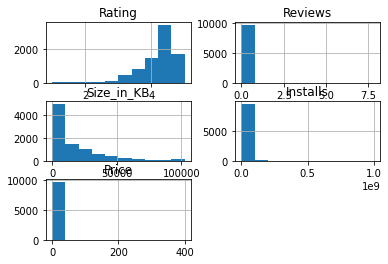

In [59]:
# Let's check the skeness of data.
GPStore.hist()
plt.show()

### Rating feature skewed to right so we have to use median instead of mean, for size data seems to skewed to left so the mean will be lower than the median for size feature.

In [60]:
# installing the pandas profiling
try:
    !pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
except BaseException as be:
    Print("Please restart runtime",be) 

  Using cached https://github.com/pandas-profiling/pandas-profiling/archive/master.zip


In [61]:
# Importing profile report from pandas profiling.
from pandas_profiling import profile_report

In [62]:
# Collecting The Pandas Profile Report.
GPStore.profile_report()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### Pandas Profiling provides us a piece of very basic and useful information about the data without doing any explicit exploratory data analysis. That's what we love about pandas profiling, as we can see in the pandas profiling report it shows the correlation between features, Basically, pandas profiling tries to cover all the features with their properties.

## Exploratory Data Analysis Using Visualization

#### Exploratory Data Analysis refers to the critical process of performing initial investigations on data so as to discover patterns.

In [63]:
# importting library plotly
import plotly.express as px 

#### Display the average ratings of apps under each category.

In [64]:
# grouping by the column 'Category' and displaying the average rating of apps present in each category
GPStore[['Rating','Category']].groupby('Category',as_index=False).mean()

Category    Rating
0        ART_AND_DESIGN  4.357377
1     AUTO_AND_VEHICLES  4.190411
2                BEAUTY  4.278571
3   BOOKS_AND_REFERENCE  4.344970
4              BUSINESS  4.098479
5                COMICS  4.181481
6         COMMUNICATION  4.121484
7                DATING  3.970149
8             EDUCATION  4.364407
9         ENTERTAINMENT  4.135294
10               EVENTS  4.435556
11               FAMILY  4.179664
12              FINANCE  4.115563
13       FOOD_AND_DRINK  4.172340
14                 GAME  4.247368
15   HEALTH_AND_FITNESS  4.243033
16       HOUSE_AND_HOME  4.150000
17   LIBRARIES_AND_DEMO  4.178125
18            LIFESTYLE  4.093355
19  MAPS_AND_NAVIGATION  4.036441
20              MEDICAL  4.166552
21   NEWS_AND_MAGAZINES  4.121569
22            PARENTING  4.300000
23      PERSONALIZATION  4.332215
24          PHOTOGRAPHY  4.157414
25         PRODUCTIVITY  4.183389
26             SHOPPING  4.230000
27               SOCIAL  4.247291
28               SPORTS  4.216154
29                TOOLS  4.039554
30     TRAVEL_AND_LOCAL  4.069519
31        VIDEO_PLAYERS  4.044595
32              WEATHER  4.243056

In [65]:
# Distribution of average app rating as per their category
average_rating = GPStore.groupby(['Category','Type'],as_index=False)['Rating'].median()

In [66]:
# Applying a format with the help of lambda function to restrict the decimal points in rating column
average_rating['Rating']=average_rating['Rating'].apply(lambda x:"{0:1.1f}".format(x))

In [67]:
# Plotting a bar plot using plotly for average rating per category
px.bar(data_frame=average_rating,x='Category',y='Rating',text='Rating',
       title='Average Rating comparison Between Free vs Paid Applications In Each Category (Category Vs Rating)',color='Type')

In [68]:
# Printing the overall mean of the rating for all the categories in play store data
print(f"The average rating for each category is around {round(np.mean(GPStore['Rating']),1)} out of 5")

The average rating for each category is around 4.2 out of 5


##### As we can see from above bar plot overall average rating turned out be 4.2 out of 5. We can now clearly distinguish the difference of rating for paid type applications and free type applications for each categories in entire google play store.

In [69]:
# Let's install statsmodel to handle the statserror
try:
    !pip3 install git+https://github.com/statsmodels/statsmodels.git
except BaseException as be:
    print("Again failed oops",be)

  Cloning https://github.com/statsmodels/statsmodels.git to /tmp/pip-req-build-mbfth70v
  Running command git clone -q https://github.com/statsmodels/statsmodels.git /tmp/pip-req-build-mbfth70v
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for statsmodels: filename=statsmodels-0.14.0.dev0+168.g590384e8b-cp37-cp37m-linux_x86_64.whl size=17881041 sha256=e90cf5cd42595570a161aec066ee7151d5d4f692c57856ac3b176f01d13225c5
  Stored in directory: /tmp/pip-ephem-wheel-cache-7b336hy_/wheels/5c/ab/d8/d9505a18dd992621edd24cfddb9a1bd694dee85c065c0a6e57
Successfully built statsmodels
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [70]:
# Let's see how application size affects the number of rating
px.scatter(data_frame=GPStore,x='Rating',y='Size_in_KB',color='Size_in_KB',
           title="Scatter Plot Representing the effect of size on the number of rating (Rating Vs Size)")

#### The points are more dense at the lower bottom-right, meaning, less sized apps have higher ratings.

In [71]:
# Let's have a look at reviews vs rating
px.scatter(data_frame=GPStore[GPStore['Reviews']<10000],x='Reviews',y='Rating',trendline='ols',color='Rating',
           title='Scatter Plot With Trendline Represents Reviews Vs Rating',text='Rating')

####  Find the total numbers of free and paid apps for each category.

In [72]:
# grouping by the column 'Category' and 'Type' and displaying the number of apps present in each category and of each type
GPStore[['App','Category','Type']].groupby(['Category', 'Type'],as_index=False).count() 

Category  Type  App
0      ART_AND_DESIGN  Free   61
1      ART_AND_DESIGN  Paid    3
2   AUTO_AND_VEHICLES  Free   82
3   AUTO_AND_VEHICLES  Paid    3
4              BEAUTY  Free   53
..                ...   ...  ...
58   TRAVEL_AND_LOCAL  Paid   12
59      VIDEO_PLAYERS  Free  159
60      VIDEO_PLAYERS  Paid    4
61            WEATHER  Free   71
62            WEATHER  Paid    8

[63 rows x 3 columns]

In [73]:
# Let's see how price of application impacts the number of rating
px.scatter(data_frame=GPStore,x='Price',y='Rating',color='Type',trendline='ols',text='Reviews',
           title='Price Vs Rating')

##### Inference - - Of course, as the price of the application increases, there are fewer downloads hence fewer reviews and ratings as we can visualize from the above scatter plot.

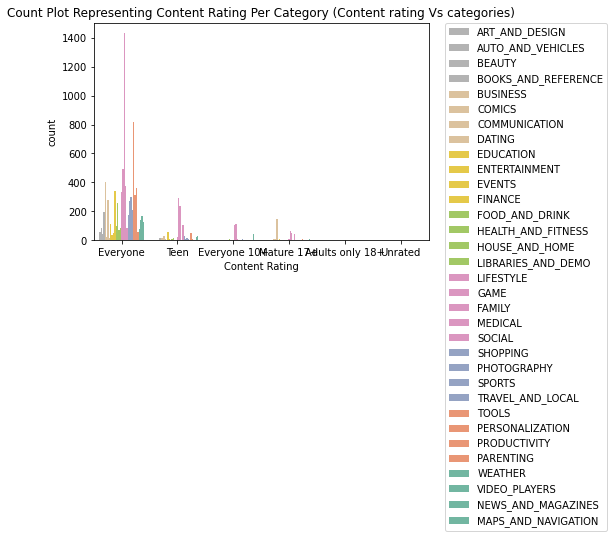

In [74]:
# countplot for content rating
import seaborn as sns
try:
    sns.countplot(x=GPStore["Content Rating"],data=GPStore,hue=GPStore.Category,palette='Set2_r')
    plt.title("Count Plot Representing Content Rating Per Category (Content rating Vs categories)")
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
    sns.set(rc={'figure.figsize':(20,20)})
    plt.show()
except BaseException as be:
    print(be)

 A count plot is a kind of like a histogram or a bar graph for some categorical area. It simply shows the number of occurrences of an item based on a certain type of category.
Content rating is another feature available in the given google play store data set.
Content rating describes the minimum maturity of content inside the applications. But doesn’t tells that application is designed for a specific age group. We used the count plot to understand the content rating for each category.
Most of the applications on google play is having a content rating for everyone. However, only the dating category is for the mature 17+ age group.

In [75]:
# Let's see what kind of content rating applications are being downloaded most.
px.bar(data_frame=GPStore,x=GPStore["Content Rating"],y='Installs',color=GPStore["Content Rating"],title='Content rating Vs Installs')

#### The applications which have a content rating for everyone are being installed most than other.

In [76]:
# Extracting the year and month from the last updated feature.
GPStore['year'] = pd.DatetimeIndex(GPStore['Last Updated']).year
GPStore['month']=pd.DatetimeIndex(GPStore['Last Updated']).month

In [77]:
px.box(data_frame=GPStore,x='Category',y='month',
       title='Box Plot Representing the Tendency of the Last Updated For Both Free And Paid Category (Categories Vs Last Update)',
       color='Type')

#### The above boxplot gives us the range of the last updated date for both free and paid applications. We can conclude from the above box plot that for free categories people usually update more often, whereas this statement is valid for some other paid categories as well.

In [78]:
# Now is the time to see the trend of each application in each year
app_count_per_year=GPStore.groupby(['year','Type'],as_index=False)['App'].count()

In [79]:
# Calculating the percentage of app increase
app_count_per_year['percentage_app_increase']=app_count_per_year['App']*100/app_count_per_year['App'].sum()

In [80]:
# Formatting the percentage column
app_count_per_year['percentage_app_increase']=app_count_per_year['percentage_app_increase'].apply(lambda x: "{0:1.2f}%".format(x))

In [81]:
# Let's see number of percentage application added each year.
px.bar(data_frame=app_count_per_year, x='year',y='App',color='Type',text='percentage_app_increase',
       title='Year vs App')

#### we can conclude that before 2011 there were no paid apps, but with the years passing free apps has been added more in comparison to paid apps, by comparing the apps updated or added in the year 2011 and 2018 free apps are increases from 0.01% to 64.61% and paid apps are goes from 0.27 to 3.18%. So, we can conclude that most people are after free apps.

In [82]:
# Let's count the application added month wise
app_count_per_month=GPStore.groupby(['Type','month'],as_index=False)['App'].count()

In [83]:
# It's time to visualize the applications added in each month using plotly bar plot
px.bar(data_frame=app_count_per_month,x='month',y='App',color='Type',text='App',
       title='Month vs App')

#### From the above bar plot we can take inference that most applications are added or updated in the month of July, it is true for both kinds of applications free and paid.

In [84]:
# Calculating number of applications available in each category and storing it in variable categories.
categories=GPStore.groupby('Category')['App'].count().reset_index().sort_values(by='App',ascending=False)

In [85]:
# Resetting the names of columns here
categories.set_axis(['Category','Count'],axis=1,inplace=True)

In [86]:
# Plotting a bar plot representing the total count of applications in each category using plotly.
px.bar(data_frame=categories,x=categories['Category'],y=categories['Count'],
       text="Count",title='Total Number of Application In Each Category')


#### The above count plot is the evidence that category family has the most number of applications available on the google play store, and very few apps are available for the category beauty and parenting. What I believe that beauty comes from inside and parenting should be come as naturally as possible.

In [87]:
# grouping by the column 'Category' and 'Type' and displaying the number of apps present in each category and of each type
GPStore[['App','Category','Type']].groupby(['Category', 'Type'],as_index=False).count() 

Category  Type  App
0      ART_AND_DESIGN  Free   61
1      ART_AND_DESIGN  Paid    3
2   AUTO_AND_VEHICLES  Free   82
3   AUTO_AND_VEHICLES  Paid    3
4              BEAUTY  Free   53
..                ...   ...  ...
58   TRAVEL_AND_LOCAL  Paid   12
59      VIDEO_PLAYERS  Free  159
60      VIDEO_PLAYERS  Paid    4
61            WEATHER  Free   71
62            WEATHER  Paid    8

[63 rows x 3 columns]

In [88]:
# Let's check the number of free and paid applications for each category
unique_last_update=GPStore.groupby(['Category','Type'],as_index=False)['App'].count().sort_values(by='App',ascending=False)

In [89]:
# Setting the name of the columns
unique_last_update.set_axis(['Category','Type','Total Number of applications'],axis=1,inplace=True)

In [90]:
# With the help of plotly bar plot experimenting which kind of applications are being updated the most.
px.bar(data_frame=unique_last_update,x='Category',y='Total Number of applications',color='Type',
       text='Total Number of applications',title='Total Number Of Free and Paid Applications In Each Category')

#### The above Bar plot shows the total number of free and paid applications in each category. The family category has 191 paid applications and 1781 are free applications. We can an explicit number of paid applications in red color and sky-blue color holds the number of free applications.
#### Almost in each category there are more number of free applications than the paid one.

In [91]:
# Let's calculate the most installed android version 
most_install_android_version=GPStore.groupby(['Android Ver','Type'])['Installs'].sum().reset_index().sort_values(by='Installs',ascending=False)

In [92]:
# Converting sum of installs into log2 scale and creating a new column named log2 installs 
most_install_android_version['log2_installs']=np.log2(most_install_android_version['Installs'])

In [93]:
# Applying a format to restrict the decimal points to avoid overwhelming of decimal points in installs columns
most_install_android_version['log2_installs']=most_install_android_version['log2_installs'].apply(lambda x:"{0:1.1f}".format(x))

In [94]:
# using plotly bar plot let's visualize which android version being installs along with its category type 
px.bar(data_frame=most_install_android_version,x='Android Ver',y='log2_installs',color='Type',
       text='log2_installs',title='Most Installed Android Version With Respect to Type')

#### From the above bar plot it can be understood that most installed applications android version varies with the device, second highest installed android version is 4.1 and up

In [95]:
# Let's have a look at number of application as per the current version
current_version_available=GPStore.groupby('Current Ver')['App'].count().reset_index().sort_values(by='App',ascending=False)

In [96]:
# Top 25 current version with most number of applications
current_version_available=current_version_available.head(25)

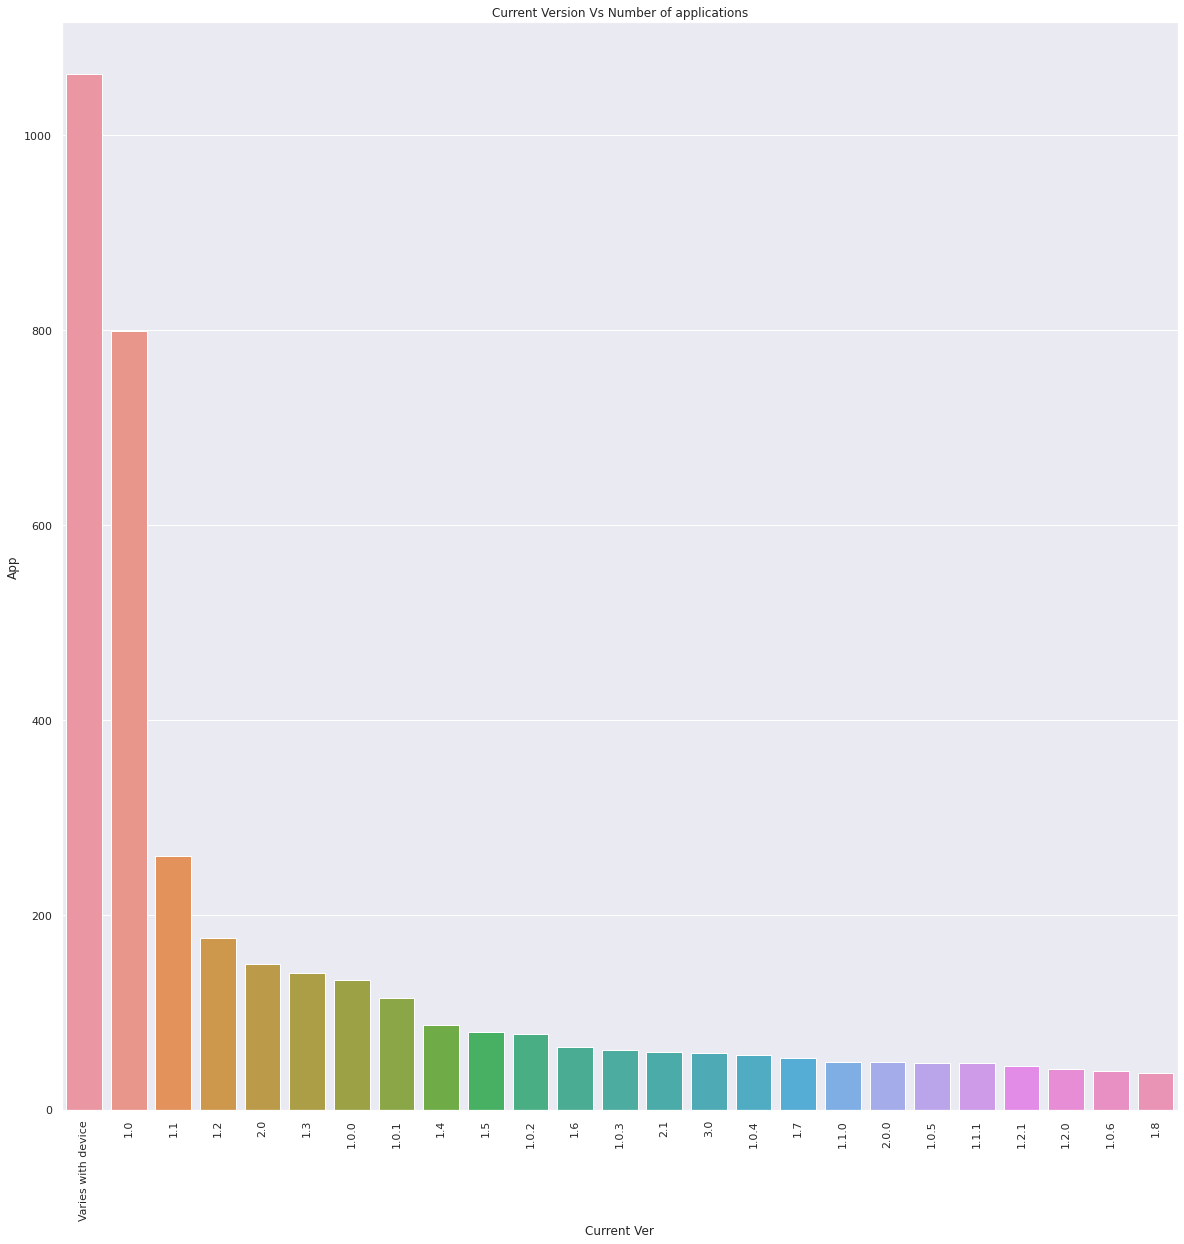

In [97]:
# Let's use seaborn barplot this time 
sns.barplot(data=current_version_available,x='Current Ver',y='App')
plt.xticks(rotation=90)
plt.title("Current Version Vs Number of applications")
sns.set(rc={'figure.figsize':(22,12)})
plt.show()

#### From the above seaborn barplot we can recognize that most of the applications has current version which varies with the device.

#### Exploring the correlation between the size of the app and the version of Android on the number of installs.

In [98]:
# Now here to know number application in each genres
genres_count=GPStore.groupby('Genres')['App'].count().reset_index().sort_values(by='App',ascending=False)

In [99]:
# setting the colum name
try:
    genres_count.set_axis(['Genres','Number of applications'],axis=1,inplace=True)
except BaseException as be:
    print(be)

In [100]:
# I'm putting a restriction upto top 25 genres
genres_count=genres_count.head(25)

In [101]:
# It's time to see the top 25 genres with most applications
px.bar(data_frame=genres_count,x='Genres',y='Number of applications',text='Number of applications',color='Genres',
       title='TOP 25 Genres By Number Of Applications')

#### From the above countplot we can see the tools genres has the most number of applications, we can see the total number of application in top 25 genres.

In [102]:
# Groupby on genres and and summing installs to know the highest installs generes
most_installed_genres=GPStore.groupby('Genres')['Installs'].sum().reset_index().sort_values(by='Installs',ascending=False)

In [103]:
# Converting the installs into np log2 scale and storing in a new colum.
try:
    most_installed_genres['log2_installs']=np.log2(most_installed_genres['Installs'])
    most_installed_genres['log2_installs']=most_installed_genres['log2_installs'].apply(lambda x:"{0:1.1f}".format(x))
except BaseException as be:
    print(be)

In [104]:
# Let's visualize top 25 installed genres.
most_installed_genres=most_installed_genres.head(25)

In [105]:
# Plotting the bar plot for top 25 genres that being installed most.
px.bar(data_frame=most_installed_genres,x='Genres',y='log2_installs',text='log2_installs',
       color='Genres',title='Most Installed 25 Genres (Genres Vs Installs)')

#### Genres communication has the highest number of installs and second highest downloads are for the productivity genres.

In [106]:
# Grouby category and summing the price 
price_per_category=GPStore.groupby('Category',as_index=True)['Price'].sum().reset_index()

In [107]:
# Applying lambda function for proper formatting upto 1 float point decimal of price values.
price_per_category['Price']=price_per_category['Price'].apply(lambda x: "{0:1.1f}$".format(x))

In [108]:
# Plotting bar plot using plotly.
px.bar(data_frame=price_per_category,x='Category',y='Price',text='Price',
       title='Price per category in dollars for paid type applications only (Categories Vs Price)')

#### One can clearly understand that applications from the category finance have high price than any others, family category applications are second high priced applications, at third we have lifestyle category applications and at last, we have medical category applications, these four categories application charges high price when compared with others.


In [109]:
# Category with the Most Reviews:
most_reviewed_category=GPStore.groupby('Category',as_index=False)['Reviews'].sum()  

In [110]:
# Calculating total number of reviews in entire given google play store data set storing it into total reviews variable
total_reviews=GPStore['Reviews'].sum()

In [111]:
# Calculating percentage review and creating a new column for that.
most_reviewed_category['percentage_review']=most_reviewed_category['Reviews']*100/total_reviews

In [112]:
# Applying lambda function for proper formatting on newly created percentage review column
most_reviewed_category['percentage_review']=most_reviewed_category['percentage_review'].apply(lambda x: "{0:1.2f}%".format(x))

In [113]:
# Plotting a bar plot using plotly to find out which category has most reviews and which category has least
px.bar(data_frame= most_reviewed_category, x ="Category", y = "Reviews",
                     title='Most Reviewed Category in Percentage Reviews (Categories Vs Reviews)',text="percentage_review")

#### As we can check gaming category have highest percentage reviews, The second highly reviewed category is communication. For events category there are almost no reviews, second least reviewed category beauty

In [114]:
# Creating a dataframe for categories alongwith their number of installs
unique_category=GPStore.groupby('Category',as_index=False)['Installs'].sum()

In [115]:
# Calculating the total installs in entire given play store data set
total_installs=GPStore['Installs'].sum()

In [116]:
# Creating a new column percentage intalls 
unique_category['percentage_installs']=unique_category['Installs']*100/total_installs

In [117]:
# Applying lambda function for proper formatting of values inside percentage installs upto 1 float point decimal
unique_category['percentage_installs']=unique_category['percentage_installs'].apply(lambda x: "{0:1.2f}%".format(x))

In [118]:
# Plotting bar plot using plotly to find out the percentage installs of each category, here color parameter i have added for understanding the range of number of installs.
px.bar(data_frame=unique_category,x="Category",y="Installs",text='percentage_installs',color='Installs',
       title='Most Installed Category in Percentage Installs (Categories Vs Installs)')


#### On the right-hand side of the above bar plot, there is scale available installs, which we can relate with the heatmap correlation scale, It's interesting right, Now we can easily interpret that the game category has the highest percentage of installs that is 20.93% around 21% and second highest is communication have 19.48% percentage installs.

#### After performing all of the above three tasks on each category on the basis of reviews, space required, and installation. we can dominantly conclude that the apps that belong to the gaming category have the highest reviews and installation. While applications that belong to the family category consume high space compare to other categories on the google play store. We can figure out that the second-highest installation is happening for the category of communication, people are working on their communication skills that' great to know!

In [119]:
# Let's check the number of installation according category type
category_type_wise_installs=GPStore.groupby(['Category','Type'],as_index=False)['Installs'].sum()

In [120]:
# Checking the head of category type wise installs dataframe
category_type_wise_installs.head(4)

Category  Type   Installs
0     ART_AND_DESIGN  Free  114322100
1     ART_AND_DESIGN  Paid      16000
2  AUTO_AND_VEHICLES  Free   53080061
3  AUTO_AND_VEHICLES  Paid      50150

In [121]:
# Converting installs into a suitable scale using np.log2 as np.log2 function which converts complex input into a proper scale.
category_type_wise_installs['log2_installs']=np.log2(category_type_wise_installs['Installs'])

In [122]:
# Now we can see that installs look preety drawable.
category_type_wise_installs.head(4)

Category  Type   Installs  log2_installs
0     ART_AND_DESIGN  Free  114322100      26.768529
1     ART_AND_DESIGN  Paid      16000      13.965784
2  AUTO_AND_VEHICLES  Free   53080061      25.661667
3  AUTO_AND_VEHICLES  Paid      50150      15.613962

In [123]:
# Apply lambda function to convert into a proper format
category_type_wise_installs['log2_installs']=category_type_wise_installs['log2_installs'].apply(lambda x: "{0:1.1f}".format(x))

In [124]:
# Plotting plotly bar plot so as to understand category type effect on number of installs
px.bar(data_frame=category_type_wise_installs,x="Category",y='log2_installs',text='log2_installs',color='Type',
       title="Bar Plot Representing Category Type Effect on installation Numbers (Categories Vs Installs Vs Type)")


#### Obiviously from above barplot, apps that are belongs to type free have more installation rate than that of paid, So people are more willing to go with free applications


In [125]:
# let's explore android version vs installs vs size of applications.
size_vs_android_ver=GPStore.groupby(['Android Ver','Size_in_KB'])['Installs'].sum().reset_index()

In [126]:
# Transforming the installs into proper format.
try:
    size_vs_android_ver['Installs']=np.log2(size_vs_android_ver['Installs'])
    size_vs_android_ver['Installs']=size_vs_android_ver['Installs'].apply(lambda x: "{0:1.1f}".format(x))
except Exception as be:
    print(be)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning:

divide by zero encountered in log2



In [127]:
# Now use plotly for visualization
px.bar(data_frame=size_vs_android_ver,x='Android Ver',y='Installs',color='Size_in_KB',text='Installs',
       title='Android version vs Installs vs Size')

#### From the above bar plot, we can see the range of application size and installs in each android version. 4.1 and up android version has the highest number of installs and the size of the application is mostly in the range of 0 to 40 Mb.

In [128]:
# Now let's see will size of the application affect the installation rate
try:
    category_size_installs=GPStore.groupby(['Type','Size_in_KB'],as_index=False)['Installs'].sum()
    category_size_installs['log2_installs']=np.log2(category_size_installs['Installs'])
except BaseException as be:
    print(be)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning:

divide by zero encountered in log2



In [129]:
# Applying proper formatting for newly created column
category_size_installs['log2_installs']=category_size_installs['log2_installs'].apply(lambda x: "{0:1.1f}".format(x))

In [130]:
# Let's plot it by using scatter plot
px.scatter_3d(data_frame=category_size_installs,x='Size_in_KB',y='log2_installs',z='Type',color='Type',
              title='Size Vs Type Vs Installs')

#### We can draw a conclusion by observing and visualizing to above scatter plot. Whether the application belongs to free type or paid type. Most of the customers on google play store prefers to install, small size application. Most installation rates can be observed between the application size 0 to 20 MB.

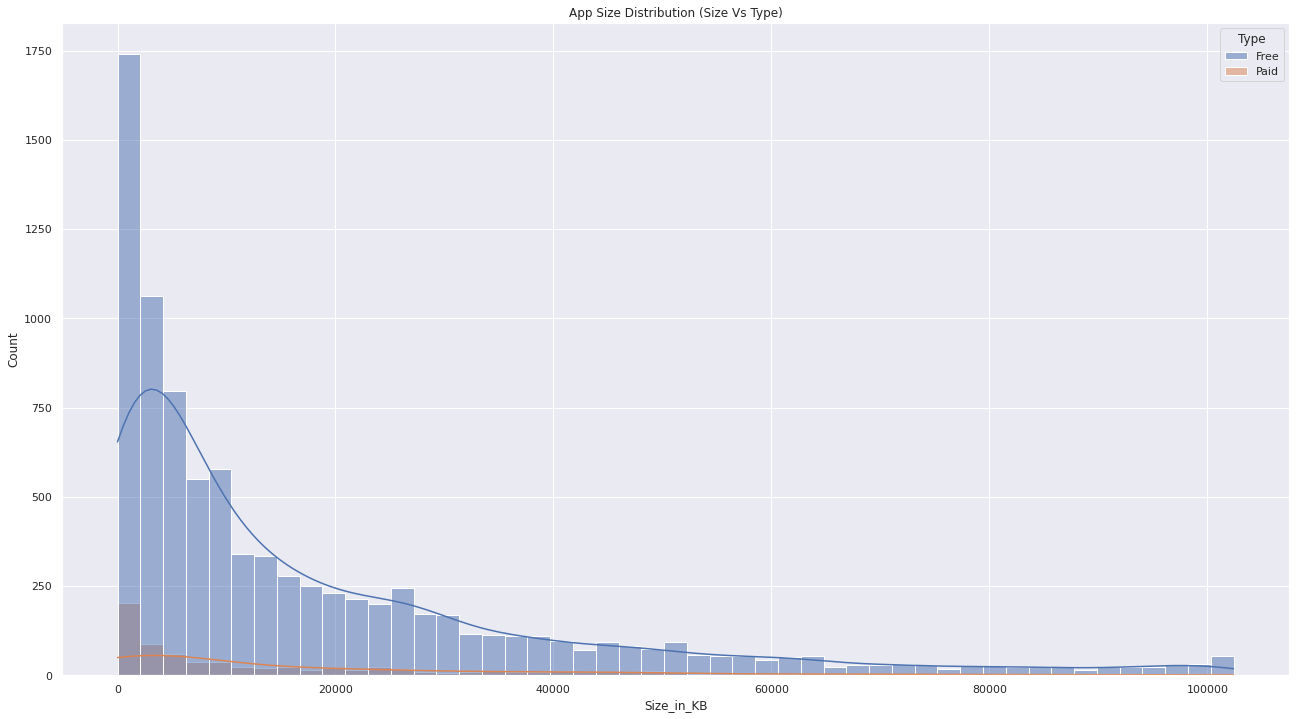

In [131]:
# We can analize this fact that people often install less size application with the help of below histogram.
sns.histplot(data=GPStore, x='Size_in_KB',hue='Type',kde=True)
plt.title("App Size Distribution (Size Vs Type)")
sns.set(rc={'figure.figsize':(18,9)})
plt.show()

#### By observing the above histogram with KDE (Kernal density estimation) KDE line for paid type applications represented in orange color whereas sky-blue colored KDE line for the free type applications we are able to draw a conclusion that there are maximum number of applications whose range of size is between 0 to 25 or 30 Mb.
#### The size of the application has a considerable impact on the performance and space and power consumption of the device. So it is advisable to keep the size of the application optimized.

In [132]:
# Plotting the bar plot to explore the size distribution for both free and paid applications
px.box(data_frame=GPStore,x='Type',y='Size_in_KB',color='Type',title='Size Distribution For Both Free and Paid Applications')

####  The above box plot shows that the median for the free type application is 13 MB whereas for the paid type application median is 9.5 MB. Most of the free type of applications has the size in the range of 0 to 30 MB, Whereas for the most paid applications is in the range of 0 to 28 MB.

In [133]:
# let's check the correlation of features with each other using corr method
GPStore.corr()

Rating   Reviews  Size_in_KB  ...     Price      year     month
Rating      1.000000  0.055081    0.037620  ... -0.021199  0.125843  0.011523
Reviews     0.055081  1.000000    0.037880  ... -0.007598  0.058073  0.036541
Size_in_KB  0.037620  0.037880    1.000000  ... -0.015055  0.149604  0.017472
Installs    0.040143  0.625165   -0.007474  ... -0.009405  0.068839  0.043178
Price      -0.021199 -0.007598   -0.015055  ...  1.000000 -0.003608  0.007348
year        0.125843  0.058073    0.149604  ... -0.003608  1.000000 -0.199906
month       0.011523  0.036541    0.017472  ...  0.007348 -0.199906  1.000000

[7 rows x 7 columns]

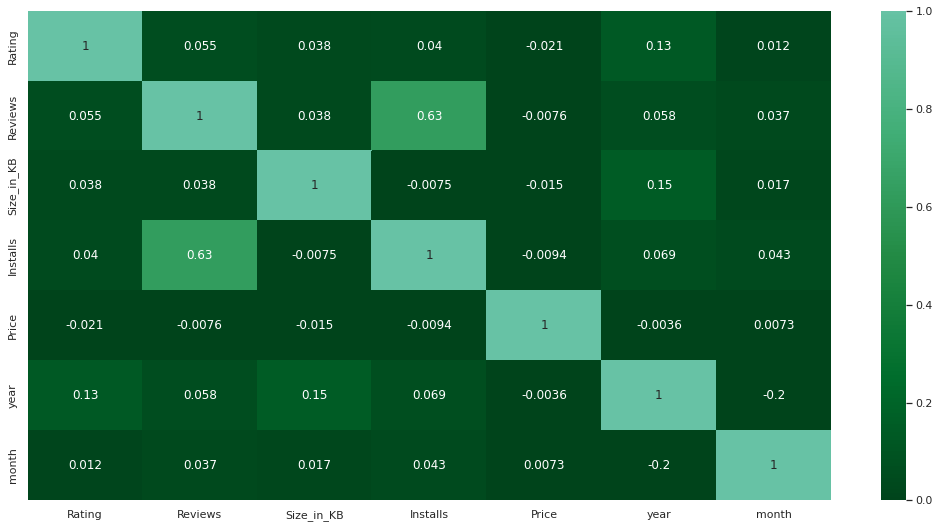

In [134]:
# Let's see it 
import seaborn as sns; sns.set_theme()
sns.heatmap(GPStore.corr(),annot=True,cmap="BuGn_r",center=True,cbar=True,vmin=0,vmax=1)
sns.set(rc={'figure.figsize':(16,7)})
plt.show()

#### At this moment in time, I'm pretty much confident to say that firstly reviews and installs are highly correlated with each other, secondly, reviews and size are highly correlated. Thirdly reviews are correlated with size, This is what I'm getting from the above heatmap.


In [135]:
#Find the number of App's that have more than 1 lakh installs.

GPStore[GPStore.Installs > 100000]['App'].count()

3900